## Linear Regression 
1. Univariate Regression
2. Multivariate Regression

### Univariate Regression (Simple Regression): O/p variable depends only on a single variable

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
%matplotlib inline

In [4]:
cd D:\Courses\AI\Machine learning\My Courses\ML\My course\Day4\Regression\All Regression Model with Advertising Data

D:\Courses\AI\Machine learning\My Courses\ML\My course\Day4\Regression\All Regression Model with Advertising Data


In [20]:
#Get the dataset
df = pd.read_csv("Advertising_data.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


In [6]:
df.shape

(200, 4)

In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,1402.250000
std,85.854236,14.846809,21.778621,521.745657
min,0.700000,0.000000,0.300000,160.000000
25%,74.375000,9.975000,12.750000,1037.500000
50%,149.750000,22.900000,25.750000,1290.000000
75%,218.825000,36.525000,45.100000,1740.000000
max,296.400000,49.600000,114.000000,2700.000000


#### Simple / Univariate Linear Regression
1. Estimate the sales withh respect to the advertisement on Television. 

In [8]:
# Getting the Regression Variables
X = df['TV'].values.reshape(-1,1)
y = df['sales'].values.reshape(-1,1)

In [9]:
X.shape

(200, 1)

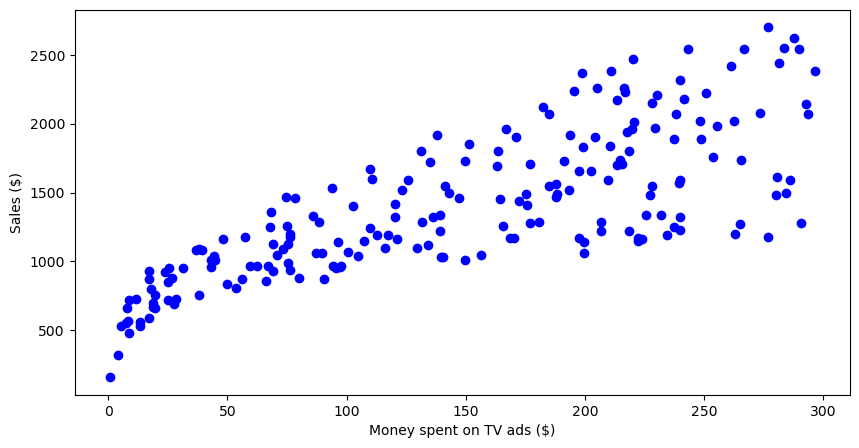

In [10]:
#Ploting the samples each sample is a parir (x,y)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, c='blue')
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [11]:
#Splitting our dataset to Training and Testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Train the Linear Regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [13]:
#predicting the Test set result
y_pred = reg.predict(X_test)

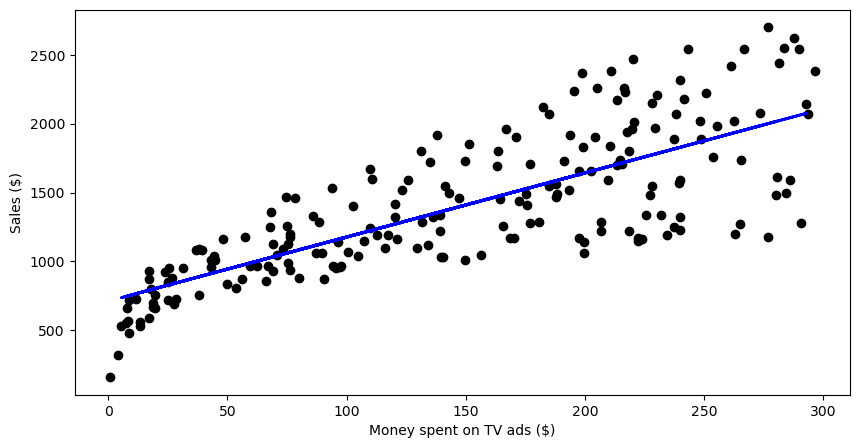

In [22]:
### Plotting the regression Line
plt.figure(figsize=(10,5))
plt.scatter(X, y, c='black')
plt.plot(X_test,y_pred,c='blue',linewidth=2)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

#### Get The Equation parameters ( cofficient and intercept)

In [14]:
#Calculating the Coefficients
reg.coef_

array([[4.65297337]])

In [15]:
#Calculating the Intercept
reg.intercept_

array([711.96384306])

#### Get the Regression Metrics ( r2, MAE, MSE)

In [16]:
#Calculating the R squared value
r2_score(y_test, y_pred)

0.6766954295627077

In [17]:
#Calculating the MAE Error
mean_absolute_error(y_test, y_pred)

244.44200037510421

In [18]:
#Calculating the MSE Error
mean_squared_error(y_test, y_pred)

102046.54118800955

#### Prediction using the model

In [43]:
output = reg.predict([[230.1]])
output

array([[1782.61301562]])

### Multivariate  Regression (Simple Regression): O/p variable depends on many variables
1. Estimate the sales withh respect to the advertisement on Television , Radio and Newspapers

In [21]:
#Get the regression variables
X = df.drop(['sales'], axis=1)
y = df['sales'].values.reshape(-1,1)

In [22]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [24]:
#Splitting our dataset to Training and Testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#Train the Linear Regression model
multiple_reg = LinearRegression()
multiple_reg.fit(X_train, y_train)

LinearRegression()

In [26]:
# predicting the Test set result
y_pred = multiple_reg.predict(X_test)

#### Get The Equation parameters ( cofficient and intercept)

In [27]:
#Calculating the Coefficients (3 Coefficients )
multiple_reg.coef_

array([[ 4.47295175, 18.91950542,  0.27611143]])

In [28]:
#Calculating the Intercept
multiple_reg.intercept_

array([297.90673381])

#### Get the Regression Metrics ( r2, MAE, MSE)

In [29]:
#Calculating the R squared value
r2_score(y_test, y_pred)

0.899438024100912

In [30]:
#Calculating the MAE Error
mean_absolute_error(y_test, y_pred)

146.07567168117606

In [31]:
#Calculating the MSE Error
mean_squared_error(y_test, y_pred)

31740.973539761046

#### Prediction using the model

In [53]:
tv,radio,newspaper = 100,100,100
output = multiple_reg.predict([[tv,radio,newspaper]])
print(np.round(output, 2))

[[2664.76]]


C:\Users\Dr-ahmed\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
